<a href="https://colab.research.google.com/github/alro923/Tensorflow_Study/blob/main/Sarcasm_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size = 10000 
embedding_dim = 16
max_length = 32 
trunc_type='post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O /tmp/sarcasm.json

--2020-10-13 09:05:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-10-13 09:05:00 (233 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", "r") as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [ ]:
print(sentences[0])

former versace store clerk sues over secret 'black code' for minority shoppers


In [ ]:
print(labels[0])

0


In [ ]:
training_sentences = sentences[0:training_size] # 20000
testing_sentences = sentences[training_size:] # 7000

training_labels = labels[0:training_size] # 20000
testing_labels = labels[training_size:] # 7000

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
testing_padded

array([[   1, 1100, 6663, ...,    0,    0,    0],
       [ 202,    1,    8, ...,    0,    0,    0],
       [  18,  380,  191, ...,    0,    0,    0],
       ...,
       [   1,    9,   67, ...,    0,    0,    0],
       [1556,  374, 4114, ...,    0,    0,    0],
       [   1, 1700,    6, ...,    0,    0,    0]], dtype=int32)

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
history = model.fit(training_padded, training_labels, epochs=30,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5633 - accuracy: 0.7017 - val_loss: 0.3980 - val_accuracy: 0.8290
Epoch 2/30
625/625 - 2s - loss: 0.3121 - accuracy: 0.8732 - val_loss: 0.3484 - val_accuracy: 0.8504
Epoch 3/30
625/625 - 2s - loss: 0.2345 - accuracy: 0.9085 - val_loss: 0.3476 - val_accuracy: 0.8492
Epoch 4/30
625/625 - 2s - loss: 0.1888 - accuracy: 0.9294 - val_loss: 0.3605 - val_accuracy: 0.8529
Epoch 5/30
625/625 - 2s - loss: 0.1567 - accuracy: 0.9419 - val_loss: 0.3912 - val_accuracy: 0.8475
Epoch 6/30
625/625 - 2s - loss: 0.1329 - accuracy: 0.9531 - val_loss: 0.4264 - val_accuracy: 0.8448
Epoch 7/30
625/625 - 2s - loss: 0.1131 - accuracy: 0.9614 - val_loss: 0.4688 - val_accuracy: 0.8411
Epoch 8/30
625/625 - 2s - loss: 0.0975 - accuracy: 0.9668 - val_loss: 0.5079 - val_accuracy: 0.8372
Epoch 9/30
625/625 - 2s - loss: 0.0852 - accuracy: 0.9720 - val_loss: 0.5517 - val_accuracy: 0.8359
Epoch 10/30
625/625 - 2s - loss: 0.0738 - accuracy: 0.9765 - val_loss: 0.5988 - val_accuracy: 0.8286

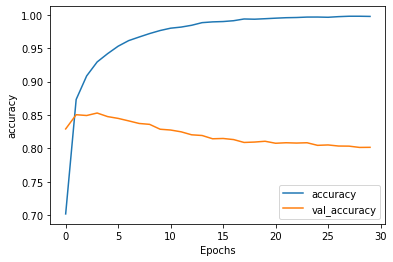

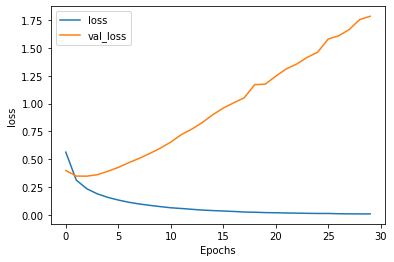

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')